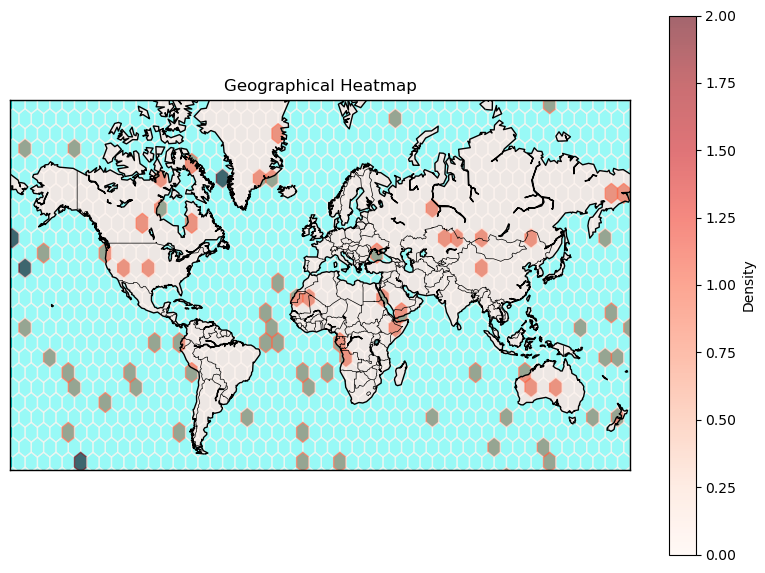

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

# Create some data points (latitude and longitude)
lats = np.random.uniform(low=-90, high=90, size=100)  # Random latitudes
lons = np.random.uniform(low=-180, high=180, size=100)  # Random longitudes

# Create a map using Basemap
plt.figure(figsize=(10, 7))
m = Basemap(projection='merc',  # Mercator projection
            llcrnrlat=-60, urcrnrlat=80,  # Latitude range
            llcrnrlon=-180, urcrnrlon=180,  # Longitude range
            resolution='c')  # Resolution of the map

m.drawcoastlines()  # Draw coastlines
m.drawcountries()  # Draw country boundaries
m.drawmapboundary(fill_color='aqua')  # Fill map background
m.fillcontinents(color='lightgray', lake_color='aqua')  # Fill continents

# Convert latitude and longitude to map coordinates
x, y = m(lons, lats)

# Create a heatmap-like scatter plot
m.hexbin(x, y, gridsize=50, cmap='Reds', alpha=0.6)

# Add colorbar to show the intensity scale
plt.colorbar(label='Density')

# Show the plot
plt.title('Geographical Heatmap')
plt.show()


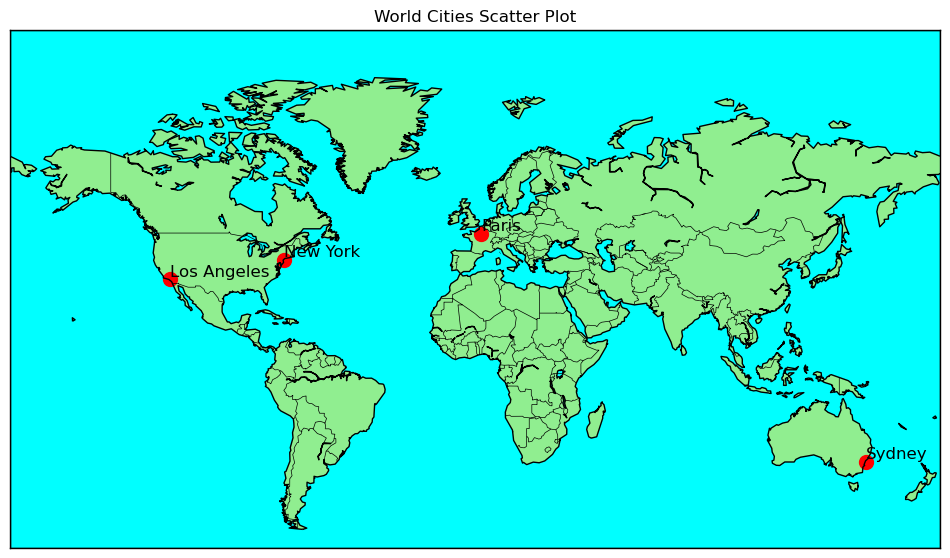

In [2]:
# Create some sample data points (latitude and longitude)
lats = [34.05, 48.85, -33.87, 40.71]  # Los Angeles, Paris, Sydney, New York
lons = [-118.25, 2.35, 151.21, -74.00]

# Create a map using Basemap
plt.figure(figsize=(12, 8))
m = Basemap(projection='mill', llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180)

m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgreen', lake_color='aqua')

# Plot the points
x, y = m(lons, lats)
m.scatter(x, y, color='red', marker='o', s=100)

# Annotate the points
locations = ['Los Angeles', 'Paris', 'Sydney', 'New York']
for i, location in enumerate(locations):
    plt.text(x[i], y[i], location, fontsize=12, ha='left', va='bottom')

plt.title('World Cities Scatter Plot')
plt.show()


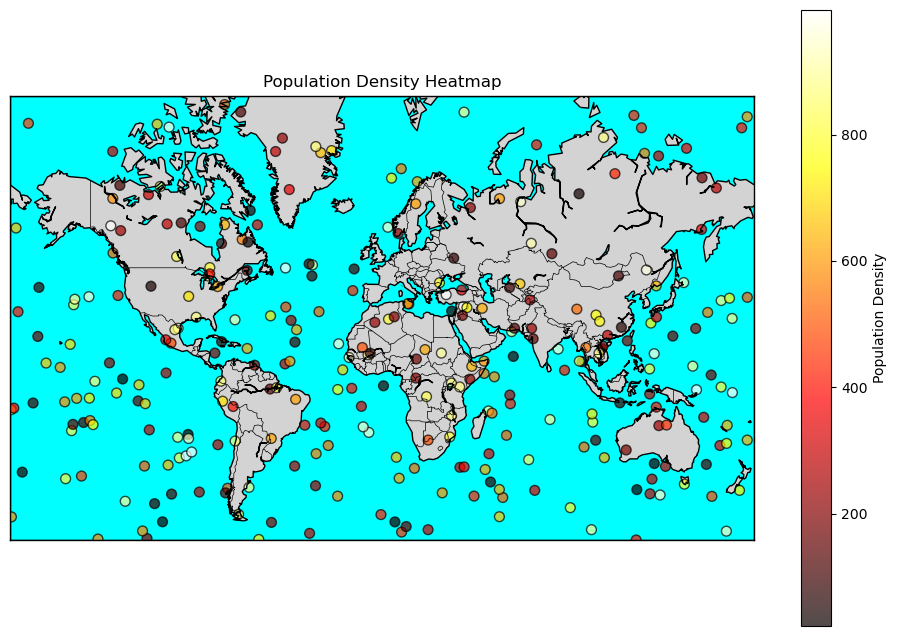

In [3]:
# Create some random data points (latitude, longitude) representing population densities
lats = np.random.uniform(-60, 80, size=300)
lons = np.random.uniform(-180, 180, size=300)
pop_density = np.random.rand(300) * 1000  # Random population density values

plt.figure(figsize=(12, 8))
m = Basemap(projection='merc', llcrnrlat=-60, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, resolution='c')

m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgray', lake_color='aqua')

# Convert lat/lon to map projection coordinates
x, y = m(lons, lats)

# Scatter plot with color-coded by population density
sc = m.scatter(x, y, c=pop_density, cmap='hot', s=50, edgecolor='k', alpha=0.7)

# Add color bar to show population density
plt.colorbar(sc, label='Population Density')

plt.title('Population Density Heatmap')
plt.show()

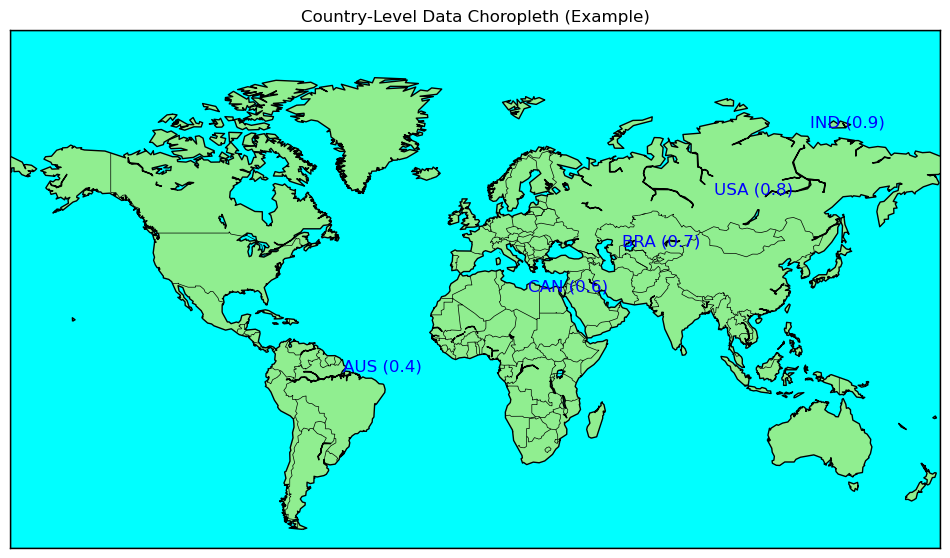

In [4]:
plt.figure(figsize=(12, 8))
m = Basemap(projection='mill', llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180)

m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgreen', lake_color='aqua')

# Dummy data: Assign random 'values' to countries (this would typically come from a dataset)
countries = ['USA', 'CAN', 'BRA', 'IND', 'AUS']
values = [0.8, 0.6, 0.7, 0.9, 0.4]  # Replace this with actual data

# Add annotations (Choropleth effect via country values)
for country, value in zip(countries, values):
    x, y = m(-180 + value * 360, -60 + value * 150)
    plt.text(x, y, f'{country} ({value})', fontsize=12, ha='center', color='blue')

plt.title('Country-Level Data Choropleth (Example)')
plt.show()

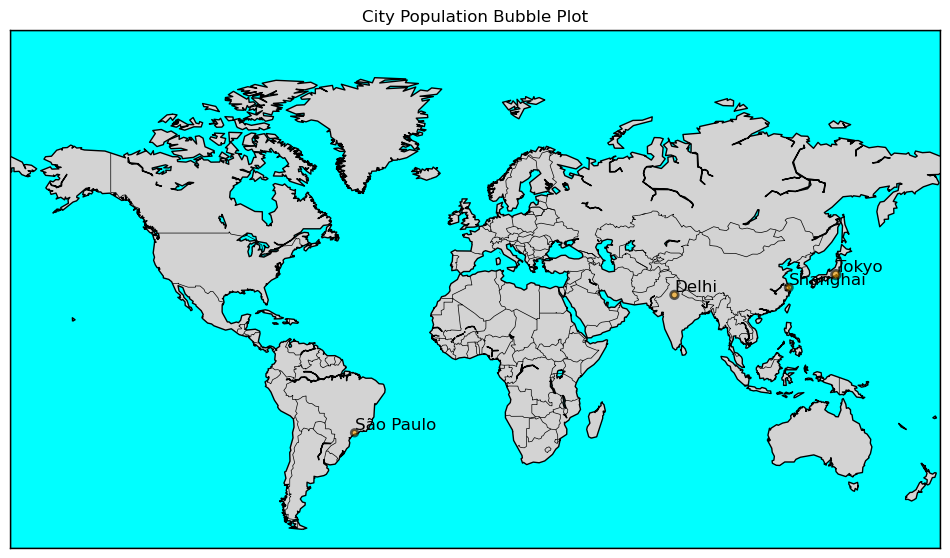

In [5]:
# Data points with latitude, longitude, and population
cities = ['Tokyo', 'Delhi', 'Shanghai', 'São Paulo']
lats = [35.68, 28.61, 31.23, -23.55]
lons = [139.69, 77.20, 121.47, -46.63]
populations = [37750, 29399, 26317, 21846]  # Population in thousands

plt.figure(figsize=(12, 8))
m = Basemap(projection='mill', llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180)

m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgray', lake_color='aqua')

# Convert lat/lon to map projection coordinates
x, y = m(lons, lats)

# Plot each city as a bubble, with size proportional to population
bubble_sizes = [pop / 1000 for pop in populations]
m.scatter(x, y, s=bubble_sizes, color='orange', alpha=0.6, edgecolor='k', linewidth=2, zorder=10)

# Annotate cities
for i, city in enumerate(cities):
    plt.text(x[i], y[i], city, fontsize=12, ha='left', va='bottom')

plt.title('City Population Bubble Plot')
plt.show()

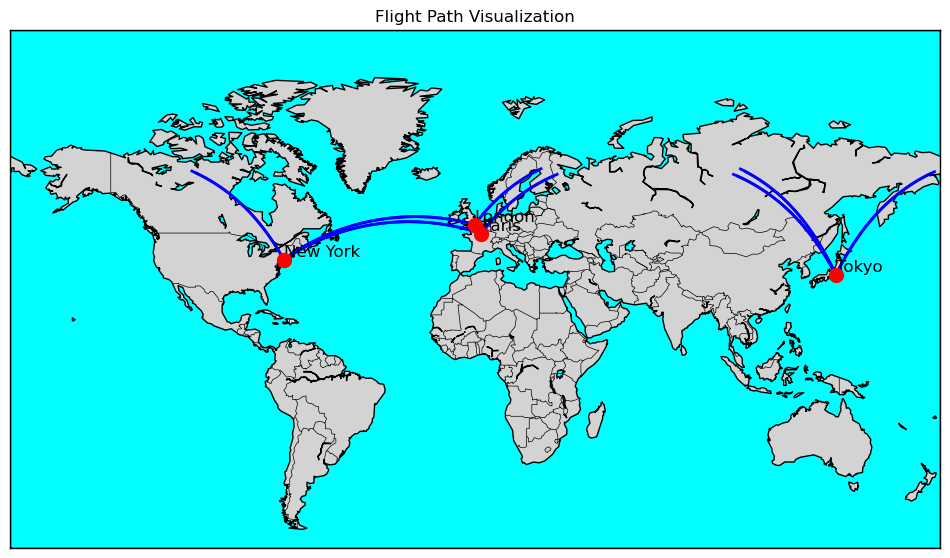

In [6]:
# Coordinates of major cities (flight path endpoints)
cities = {'New York': (40.71, -74.00), 'London': (51.51, -0.13),
          'Tokyo': (35.68, 139.69), 'Paris': (48.85, 2.35)}

plt.figure(figsize=(12, 8))
m = Basemap(projection='mill', llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180)

m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgray', lake_color='aqua')

# Draw flight paths as great circle lines between cities
for city1, (lat1, lon1) in cities.items():
    for city2, (lat2, lon2) in cities.items():
        if city1 != city2:
            m.drawgreatcircle(lon1, lat1, lon2, lat2, linewidth=2, color='blue')

# Plot cities on the map
for city, (lat, lon) in cities.items():
    x, y = m(lon, lat)
    m.scatter(x, y, s=100, color='red', zorder=5)
    plt.text(x, y, city, fontsize=12, ha='left', va='bottom')

plt.title('Flight Path Visualization')
plt.show()
